In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Experimental_Data:

    def __init__(self, json_path):

        loaded_json = self.get_json(json_path)
        
        self.id = loaded_json["id"]
        self.solver_class = loaded_json["solver_class"]
        self.initiated = bool(loaded_json["initiated"])
        self.converged = bool(loaded_json["converged"])
        self.terminated = bool(loaded_json["terminated"])
        self.iteration = int(loaded_json["iteration"])
        self.elapsed_time_ms = loaded_json["elapsed_time_ms"]
        self.res_norm_hist = np.array(loaded_json["res_norm_hist"])
        self.res_hist = np.array(loaded_json["res_hist"])
    
    def get_relres_hist(self):
        return self.res_norm_hist/self.res_norm_hist[0]
    
    def get_json(self, json_path):

        f = open(json_path, "r")
        loaded_json = json.loads(f.read())
        f.close()
    
        return loaded_json

class MPGMRESIR_Experimental_Data(Experimental_Data):

    def __init__(self, json_path):

        super().__init__(json_path)
        loaded_json = self.get_json(json_path)

        self.hlf_sgl_cascade_change = int(loaded_json["hlf_sgl_cascade_change"])
        self.sgl_dbl_cascade_change = int(loaded_json["sgl_dbl_cascade_change"])



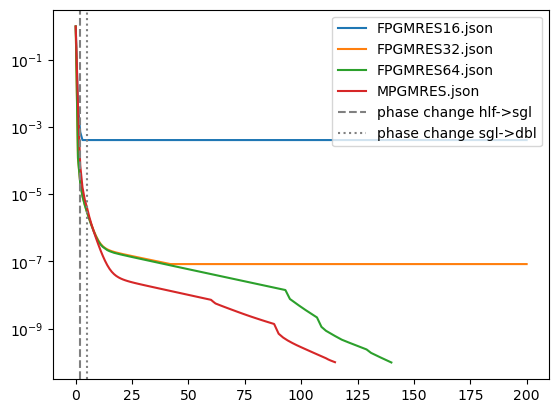

In [6]:
output_dir = "C:\\Users\\dosre\\dev\\numerical_experimentation\\output"

fig, ax = plt.subplots()
for file in ["FPGMRES16.json", "FPGMRES32.json", "FPGMRES64.json"]:
    path = os.path.join(output_dir, file)
    data = Experimental_Data(path)
    ax.plot(np.arange(0, data.iteration+1, 1), data.get_relres_hist(), label=file)
path = os.path.join(output_dir, "MPGMRES.json")
data = MPGMRESIR_Experimental_Data(path)
ax.plot(np.arange(0, data.iteration+1, 1), data.get_relres_hist(), label="MPGMRES.json")
ax.axvline(data.hlf_sgl_cascade_change, linestyle="--", color='gray', label='phase change hlf->sgl')
ax.axvline(data.sgl_dbl_cascade_change, linestyle=":", color='gray', label='phase change sgl->dbl')
ax.semilogy()
ax.legend()
plt.show()

163